In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import rainbow
import numpy as np
from scipy.integrate import odeint
from scipy.io import loadmat
import pysindy as ps

In [21]:
#noise "np.sqrt(dt)*(c)*(np.random.randn())"
g = 9        #gravity aprrox
l = 3         #pendulum length
lam = 0.2   #decay 
c1 = 0.0    #noise_1
c2 = 0.1    #noise_2
c3 = 1.0    #noise_3
T = 25      #total Time duration in steps
x0 = 2     #initial condition of x at time 0
y0 = 0      #initial condition of y at time 0
dt =0.01    #timestep

# initiatialize variables
t = np.arange(0, T, dt)

x = np.zeros_like(t)
y = np.zeros_like(t)

a = np.zeros_like(t)
b = np.zeros_like(t)

w = np.zeros_like(t)
z = np.zeros_like(t)

x[0] = x0  #theta
y[0] = y0  #theta_dot

a[0] = x0  #theta
b[0] = y0  #theta_dot

w[0] = x0  #theta
z[0] = y0  #theta_dot

# Step through in time
for k in range(len(t)-1):
    x[k+1] = x[k]+dt*(-lam*x[k] + 3*y[k]) + np.sqrt(dt)*(c1)*(np.random.randn())
    y[k+1] = y[k]+dt*(-lam*y[k] + (-g/l)*x[k])
    #print(x[k],y[k])
    
data_1 = np.vstack((x, y)).T

In [7]:
#increased noise c2
for k in range(len(t)-1):
    a[k+1] = a[k]+dt*(-lam*a[k] + 3*b[k]) + np.sqrt(dt)*(c2)*(np.random.randn())
    b[k+1] = b[k]+dt*(-lam*b[k] + (-g/l)*a[k])
        
data_2 = np.vstack((a, b)).T

In [8]:
#increased noise c3

for k in range(len(t)-1):
    w[k+1] = w[k]+dt*(-lam*w[k] + 3*z[k]) + np.sqrt(dt)*(c3)*(np.random.randn())
    z[k+1] = z[k]+dt*(-lam*z[k] + (-g/l)*w[k])
    
data_3 = np.vstack((w, z)).T

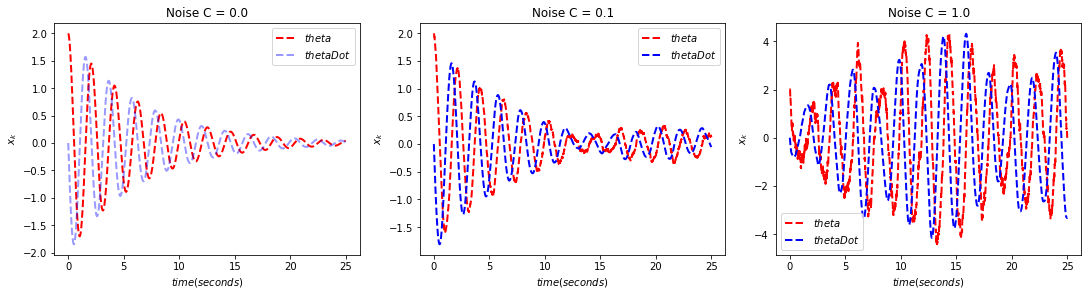

In [23]:
plot_kws = dict(linewidth=2)
fig, axs = plt.subplots(1, 3, constrained_layout=True,figsize=(15, 4))
axs[0].plot(t, data_1[:, 0], "r--", label="$theta$", **plot_kws)
axs[0].plot(t, data_1[:, 1], "b--", label="$theta Dot$", alpha=0.4, **plot_kws)
axs[0].set(xlabel="$time (seconds)$", ylabel="$x_k$")
axs[0].legend(loc="best")
axs[0].set_title("Noise C = " + str(c1))

axs[1].plot(t,data_2[:, 0], 'r--', label="$theta$", **plot_kws)
axs[1].plot(t,data_2[:, 1], 'b--', label="$theta Dot$",  **plot_kws)
axs[1].set(xlabel="$time (seconds)$", ylabel="$x_k$")
axs[1].legend(loc="best")
axs[1].set_title("Noise C = " + str(c2))

axs[2].plot(t,data_3[:, 0], 'r--', label="$theta$", **plot_kws)
axs[2].plot(t,data_3[:, 1], 'b--', label="$theta Dot$",  **plot_kws)
axs[2].set(xlabel="$time (seconds)$", ylabel="$x_k$")
axs[2].legend(loc="best")
axs[2].set_title("Noise C = " + str(c3))
fig.tight_layout
fig.show()

In [24]:
poly_order = 1
threshold = 0.5
#fd_drop_endpoints = ps.FiniteDifference(drop_endpoints=True)
smoothed_fd=ps.SmoothedFiniteDifference()

model1 = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
)
model2 = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
    differentiation_method=smoothed_fd,
)
model3 = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
    differentiation_method=smoothed_fd,
)
model1.fit(data_1, t=dt)
model2.fit(data_2, t=dt)
model3.fit(data_3, t=dt)
print("c1")
model1.print()
print("\nc2")
model2.print()
print("\nc3")
model3.print()

c1
x0' = 3.013 x1
x1' = -2.997 x0

c2
x0' = 2.986 x1
x1' = -2.996 x0

c3
x0' = 3.179 x1
x1' = -2.986 x0
